<a href="https://colab.research.google.com/github/Fermu25/Cursos/blob/main/Clase12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de regresión
Regresión lineal simple

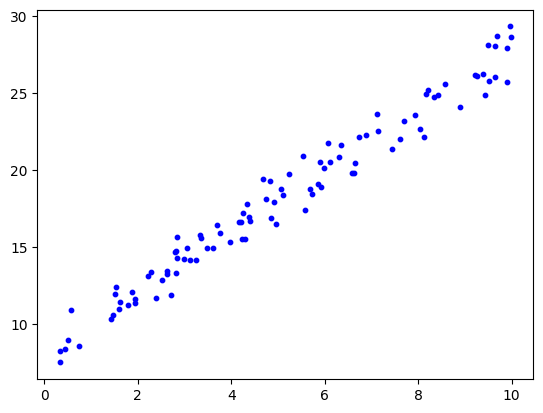

In [1]:
#Regresion lineal en Scikit-learn
import matplotlib.pyplot as plt
import numpy as np
x_train = 10*np.random.rand(100) #creo una función X-train con random
noise = np.random.normal(0, 1, 100) #gaussiana, media, desv std. No.puntos
y_train = (2*x_train + 8) + noise
plt.scatter(x_train, y_train, s=10, c='blue')

Los coeficientes de la regresión lineal simple, $\beta_0$ (intercepto) y $\beta_1$ (pendiente), se obtienen al **minimizar la suma de los cuadrados de los residuos (SCR)**. Un residuo es la diferencia entre el valor observado ($y_i$) y el valor estimado por el modelo ($\hat{y}_i$).

La ecuación de la línea de regresión para una observación $i$ es:
$$
\hat{y}_i = \beta_0 + \beta_1 x_i
$$
Donde $\hat{y}_i$ es el valor predicho.

El problema de optimización para encontrar los coeficientes óptimos $(\beta_0, \beta_1)$ es el siguiente:
$$
(\beta_0, \beta_1) = \arg \min_{\beta_0, \beta_1} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$
Sustituyendo la ecuación del modelo:
$$
(\beta_0, \beta_1) = \arg \min_{\beta_0, \beta_1} \sum_{i=1}^{n} \left(y_i - (\beta_0 + \beta_1 x_i)\right)^2
$$
Esta minimización se resuelve, por ejemplo, tomando las derivadas parciales con respecto a $\beta_0$ y $\beta_1$ e igualándolas a cero.

\section{Predicción del Modelo}

Una vez obtenidos los coeficientes, el modelo de regresión lineal está completamente especificado. Para un nuevo conjunto de puntos de prueba $x_{\text{test}}$, la predicción ($\hat{y}_{\text{test}}$) se calcula de la siguiente manera:
$$
\hat{y}_{\text{test}} = \beta_0 + \beta_1 x_{\text{test}}
$$

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

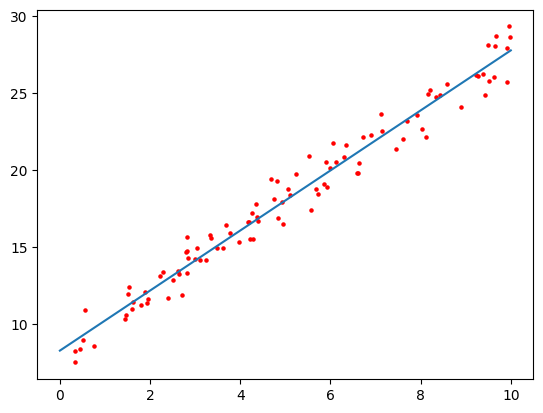

In [7]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train[:, np.newaxis], y_train) #fit hace minimos cuadrados, agrega un eje pra guardar los resultados
# Predecir para 50 valores igualmente espaciados en [0, 10]
x_test = np.linspace(0, 10, 50)#Puntos igualmente espaciados, siempre hay que hacer un test por un train
y_test = reg.predict(x_test[:, np.newaxis])
plt.scatter(x_train, y_train, s=5, c='red')
plt.plot(x_test, y_test)

In [6]:
type(x_test)

numpy.ndarray

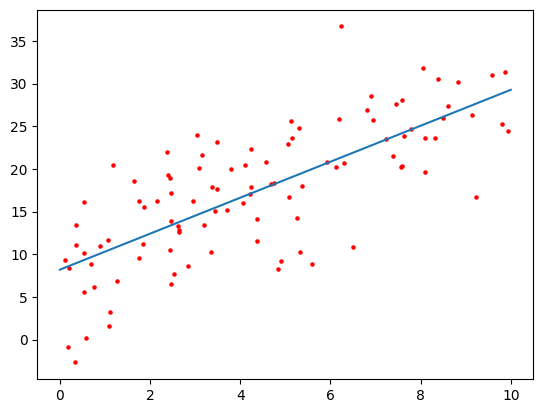

In [13]:
x_train = 10*np.random.rand(100) #creo una función X-train con random
noise = np.random.normal(0, 5, 100) #Añado mas ruido aumentando la desv standar
y_train = (2*x_train + 8) + noise


reg = LinearRegression()
reg.fit(x_train[:, np.newaxis], y_train) #fit hace minimos cuadrados, agrega un eje pra guardar los resultados
# Predecir para 50 valores igualmente espaciados en [0, 10]
x_test = np.linspace(0, 10, 50)#Puntos igualmente espaciados, siempre hay que hacer un test por un train
y_test = reg.predict(x_test[:, np.newaxis])
plt.scatter(x_train, y_train, s=5, c='red')
plt.plot(x_test, y_test)

Existen varias métricas para evaluar la precisión de un modelo de regresión, comparando los valores reales $y_i$ con los valores predichos $\hat{y}_i$. Estas métricas se calculan automáticamente con funciones como \texttt{cross\_val\_score} en \texttt{scikit-learn}.

\subsection{Error Absoluto Medio (MAE)}

El **Error Absoluto Medio (MAE)** es el promedio de la magnitud de los errores en un conjunto de predicciones. Se define como:
$$
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
$$
El MAE es robusto frente a valores atípicos, ya que trata todos los errores linealmente. Es fácil de interpretar porque está en las mismas unidades que la variable de respuesta ($y$).

\subsection{Error Cuadrático Medio (MSE)}

El **Error Cuadrático Medio (MSE)** es el promedio de los cuadrados de los errores. Se define como:
$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$
El MSE tiene la propiedad de que **penaliza más los errores grandes** debido al término de elevación al cuadrado, lo que lo hace útil cuando los errores grandes son particularmente indeseables. Sus unidades están al cuadrado de las unidades de $y$.

\subsection{Coeficiente de Determinación ($R^2$)}

El **Coeficiente de Determinación ($R^2$)** representa la proporción de la varianza en la variable dependiente que es predecible a partir de la variable(s) independiente(s). Se define a menudo en términos del MSE y la varianza de la variable real $y$:
$$
R^2 = 1 - \frac{\text{MSE}}{\text{Var}(y)}
$$
Donde la varianza de $y$ es $\text{Var}(y) = \frac{1}{n} \sum_{i=1}^{n} (y_i - \bar{y})^2$. El $R^2$ es un valor entre $-\infty$ y $1$. Un valor cercano a 1 indica que el modelo explica una gran parte de la variabilidad de la respuesta.

Ambas métricas, $\text{MAE}$ y $\text{MSE}$, son siempre mayores que cero ($\text{MAE} \ge 0$, $\text{MSE} \ge 0$). Cuanto menores sean los valores de $\text{MAE}$ y $\text{MSE}$, **mejor será el modelo** en términos de precisión.El coeficiente de determinación ($R^2$) mide la proporción de la varianza total de la variable dependiente ($y$) que es explicada por la varianza de la variable independiente ($x$) mediante el modelo de regresión. Sus valores se interpretan de la siguiente manera:

# 📈 Interpretación del Coeficiente de Determinación ($R^2$)

El coeficiente de determinación ($R^2$) mide qué tan bien los valores predichos por el modelo se ajustan a los valores reales. Específicamente, representa la proporción de la varianza total de la variable dependiente ($y$) que es explicada por el modelo de regresión.

* **$R^2 = 1$**:
    Existe una **relación lineal perfecta** entre $x$ e $y$. Esto implica que el modelo de regresión explica el $100\%$ de la variabilidad en $y$. Los valores predichos $\hat{y}_i$ coinciden exactamente con los valores reales $y_i$.

* **$0 < R^2 < 1$**:
    El modelo lineal explica una porción de la variabilidad de $y$. Una **porción de la variabilidad de $y$ no es explicada** por la variabilidad en $x$ (es decir, es atribuible al error o a otras variables no incluidas). Cuanto más cercano a $1$, mejor ajuste del modelo a los datos.

* **$R^2 = 0$**:
    **No existe relación lineal** entre $x$ e $y$. El modelo lineal no explica ninguna porción de la variabilidad de $y$; el rendimiento del modelo es tan malo como simplemente predecir la media ($\bar{y}$) para todos los puntos.

---

#  Evaluación del Rendimiento del Modelo: Validación Cruzada

Para obtener una estimación del rendimiento del modelo más **robusta, confiable y estable** se debe evitar evaluarlo sobre los mismos datos con los que fue entrenado. En su lugar, se utiliza la técnica de la **Validación Cruzada**.

## Validación Cruzada con $k=5$ Particiones ($k$-fold Cross-Validation)

En este caso, se emplea la validación cruzada con **$k=5$ particiones** ($\mathbf{k}$-fold Cross-Validation):

1.  El conjunto total de datos se divide en $\mathbf{k=5}$ subconjuntos (o *folds*) de tamaño aproximadamente igual.

2.  El proceso se repite **5 veces**. En cada iteración:
    * El modelo se **entrena** sobre $\frac{k-1}{k} = \frac{4}{5} = \mathbf{80\%}$ de los datos (las $k-1$ particiones restantes).
    * El modelo se **evalúa** sobre el $\frac{1}{k} = \frac{1}{5} = \mathbf{20\%}$ restante de los datos (la partición reservada para la prueba).

Este procedimiento produce una **estimación más estable del error** que una sola partición entrenamiento-test, ya que el proceso se repite sobre diferentes subconjuntos, mitigando el impacto de la partición particular de los datos.

**¡Importante!** El rendimiento del modelo **NUNCA** debe medirse sobre los datos de entrenamiento para evitar el optimismo sesgado (sobreajuste). La validación cruzada es crucial para la evaluación.
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

In [15]:
from sklearn.model_selection import cross_val_score
r2 = cross_val_score(reg, x_train[:, np.newaxis], y_train, cv=5,

scoring='r2')

mae = -cross_val_score(reg, x_train[:, np.newaxis], y_train, cv=5,
scoring='neg_mean_absolute_error')
mse = -cross_val_score(reg, x_train[:, np.newaxis], y_train, cv=5,

scoring='neg_mean_squared_error')
print(mse) # promedio de todos los folds
print(mae)
print(r2)
print(mse.mean()) # promedio de todos los folds
print(mae.mean())
print(r2.mean())

[21.34536157 45.10929488 26.13208263 24.8932119  27.27353813]
[3.56568538 5.57909047 3.96943154 3.75385428 4.30304288]
[0.68472801 0.35893936 0.59331907 0.19178911 0.55518558]
28.950697823318784
4.234220910865195
0.47679222571119995


1.104822016263644
0.8579586887806103
0.9663098603681497


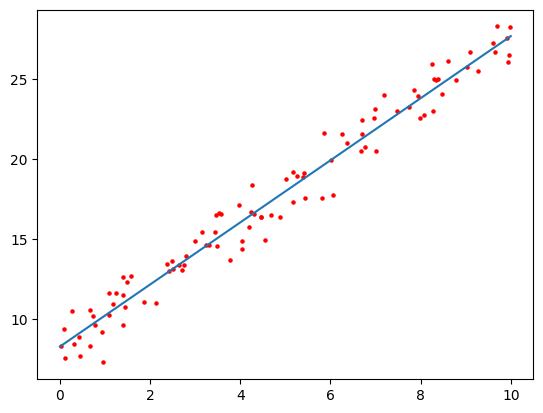

In [17]:
x_train = 10*np.random.rand(100) #creo una función X-train con random
noise = np.random.normal(0, 1, 100) #Añado mas ruido aumentando la desv standar
y_train = (2*x_train + 8) + noise


reg = LinearRegression()
reg.fit(x_train[:, np.newaxis], y_train) #fit hace minimos cuadrados, agrega un eje pra guardar los resultados
# Predecir para 50 valores igualmente espaciados en [0, 10]
x_test = np.linspace(0, 10, 50)#Puntos igualmente espaciados, siempre hay que hacer un test por un train
y_test = reg.predict(x_test[:, np.newaxis])
plt.scatter(x_train, y_train, s=5, c='red')
plt.plot(x_test, y_test)
r2 = cross_val_score(reg, x_train[:, np.newaxis], y_train, cv=5,

scoring='r2')

mae = -cross_val_score(reg, x_train[:, np.newaxis], y_train, cv=5,
scoring='neg_mean_absolute_error')
mse = -cross_val_score(reg, x_train[:, np.newaxis], y_train, cv=5,

scoring='neg_mean_squared_error')

print(mse.mean()) # promedio de todos los folds
print(mae.mean())
print(r2.mean())

Recordemos que los datos sintéticos fueron generados bajo el supuesto de que el término de error ($\varepsilon$) sigue una distribución con \textbf{ruido Gaussiano} (o ruido normal).

Para este tipo de ruido, la varianza del error ($\varepsilon$) se define como:
$$
\text{Var}(\varepsilon) = \sigma^2
$$
donde $\sigma^2$ es el parámetro de varianza de la distribución normal.

\subsection{Aproximación del MSE a la Varianza del Ruido}

Si el \textbf{modelo lineal está correctamente especificado} (es decir, la relación subyacente entre $x$ e $y$ es efectivamente lineal y se cumplen las suposiciones de Gauss-Markov), se espera que el \textbf{Error Cuadrático Medio} ($\text{MSE}$) del modelo estimado se aproxime al valor verdadero de la varianza del ruido $\sigma^2$ cuando el tamaño de la muestra ($n$) es grande.

La relación es:
$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 \approx \sigma^2
$$
Por lo tanto, el $\text{MSE}$ sirve como un \textbf{estimador insesgado de $\sigma^2$}. Si el valor de $\sigma^2$ (la varianza del ruido inyectado) es conocido de antemano (como en el caso de datos sintéticos), el valor obtenido del $\text{MSE}$ empírico debe ser cercano a $\sigma^2$.

In [22]:
sigmas = [0.5, 1, 2, 3,5,10,100]
for s in sigmas:
    noise = np.random.normal(0, s, 100)
    y_train = 2*x_train + 8 + noise
    mse = -cross_val_score(reg, x_train[:, np.newaxis], y_train,
                            cv=5, scoring='neg_mean_squared_error')

    print(f"sigma = {s}, MSE {mse.mean():.3f}")

sigma = 0.5, MSE 0.268
sigma = 1, MSE 1.149
sigma = 2, MSE 4.151
sigma = 3, MSE 10.725
sigma = 5, MSE 29.967
sigma = 10, MSE 85.795
sigma = 100, MSE 8691.102


In [25]:
sigmas = [0.5, 1, 2, 3,5,10,100]
for s in sigmas:
    noise1 = np.random.normal(0, s, 100)
    noise2 = np.random.normal(0, s, 100)
    y_train = 2*x_train + 8 + (noise1+noise2) #metemos dos ruidos
    mse = -cross_val_score(reg, x_train[:, np.newaxis], y_train,
                            cv=5, scoring='neg_mean_squared_error')

    print(f"sigma = {s}, MSE {mse.mean():.3f}") #la varianza no cambia, puedo quitar ruido haiendo regresion con datos, repartidos en el espacio dado un error

    #error poissoniano, puedo modelar el ruido y quitarlo, el MSE varia, ero la sigma no.

sigma = 0.5, MSE 0.443
sigma = 1, MSE 1.898
sigma = 2, MSE 10.117
sigma = 3, MSE 19.482
sigma = 5, MSE 61.173
sigma = 10, MSE 217.913
sigma = 100, MSE 18667.667


El conjunto de datos utilizado en este análisis proviene de una publicación de \textbf{R.J. Gladstone (1905)}, quien investigó la relación entre el \textbf{peso del cerebro} y el \textbf{tamaño de la cabeza} en diferentes géneros y grupos de edad.

El conjunto de datos incluye las siguientes variables:

\begin{itemize}
    \item \textbf{Género}:
    \begin{itemize}
        \item 1: Masculino
        \item 2: Femenino
    \end{itemize}

    \item \textbf{Rango de Edad}:
    \begin{itemize}
        \item 1: 20--46 años
        \item 2: Mayores de 46 años
    \end{itemize}

    \item \textbf{Tamaño de la Cabeza} ($\text{cm}^3$): Variable independiente clave.

    \item \textbf{Peso del Cerebro} (gramos): Variable dependiente clave.
\end{itemize}

\section{Plan de Análisis de Regresión Lineal}

A continuación, se seguirán los siguientes pasos para modelar la relación entre el tamaño de la cabeza y el peso del cerebro:

\begin{enumerate}
    \item \textbf{Carga de Datos}: Cargar y preparar el conjunto de datos de Gladstone.
    \item \textbf{División}: Dividir el conjunto de datos en subconjuntos de \textbf{entrenamiento} y \textbf{prueba}. Esto asegura una evaluación imparcial del rendimiento del modelo.
    \item \textbf{Entrenamiento del Modelo}: Entrenar un modelo de \textbf{Regresión Lineal Simple} utilizando los datos de entrenamiento para estimar la relación entre el Tamaño de la Cabeza ($x$) y el Peso del Cerebro ($y$):
    $$
    \hat{y} = \beta_0 + \beta_1 x
    $$
    \item \textbf{Visualización}: Visualizar los datos de prueba junto con la \textbf{línea de regresión ajustada} para inspeccionar visualmente la bondad del ajuste.
\end{enumerate}

In [ ]:


# Dibujar el conjunto de entrenamiento y de prueba:
plt.scatter(X_train, y_train, s=30, c="green", label="Train")
plt.scatter(X_test, y_test, s=30, c="red", label="Test")

# Línea de regresión (utilizando el rango min/max de los datos)
x_line = np.linspace(df["TamanoCabeza"].min(),
                     df["TamanoCabeza"].max(), 100)
y_line = reg.predict(x_line.reshape(-1,1))
plt.plot(x_line, y_line, color="blue", linewidth=2,
         label=f"Regresión Lineal ($R^2$ Pendiente: {beta_1:.4f})")



--- Primeras 5 filas del DataFrame ---
   Genero  Edad  TamanoCabeza  PesoCerebro
0       1     1          4512         1530
1       1     1          3738         1297
2       1     1          4261         1335
3       1     1          3777         1282
4       1     1          4177         1590


Tamaño de X_train: (165, 1)
Tamaño de X_test: (72, 1)


--- Coeficientes del Modelo ---
Intercepción (β₀): 340.8258
Pendiente (β₁): 0.2586




/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


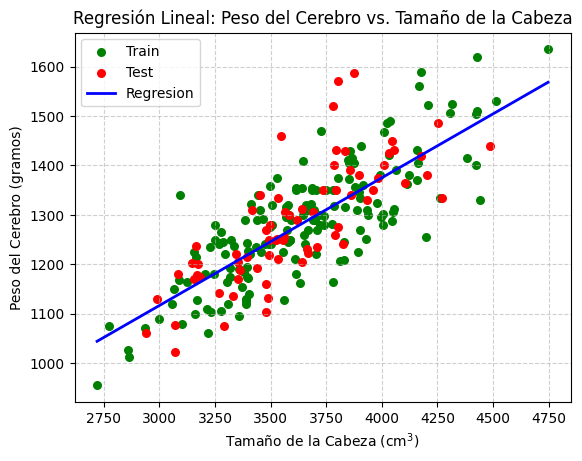

R2 Score (mean): 0.603
MAE (mean): 58.237
MSE (mean): 5141.610
R2 score on test set: 0.592


In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
import sklearn.metrics

import pandas as pd

df = pd.read_csv("cerebro.csv")

print("--- Primeras 5 filas del DataFrame ---")
print(df.head(5))
print("\n")

X = df[["TamanoCabeza"]] # variable predictora
y = df["PesoCerebro"] # variable objetivo


#Usamos un 70% para entrenamiento y un 30% para prueba:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=1234
)
print(f"Tamaño de X_train: {X_train.shape}")
print(f"Tamaño de X_test: {X_test.shape}")
print("\n")
# Entrenar el Modelo de Regresión Lineal
# Inicializar y entrenar el modelo LinearRegression usando los datos de entrenamiento,
reg = LinearRegression()
reg.fit(X_train, y_train)
# Coeficientes
beta_0 = reg.intercept_
beta_1 = reg.coef_[0]

print("--- Coeficientes del Modelo ---")
print(f"Intercepción (β₀): {beta_0:.4f}")
print(f"Pendiente (β₁): {beta_1:.4f}")
print("\n")
# Dibujar el conjunto de entrenamiento y de prueba:
plt.scatter(X_train, y_train, s=30, c="green", label="Train")
plt.scatter(X_test, y_test, s=30, c="red", label="Test")

# Línea de regresión (utilizando el rango min/max de los datos)
x_line = np.linspace(df["TamanoCabeza"].min(),
                     df["TamanoCabeza"].max(), 100)
y_line = reg.predict(x_line.reshape(-1,1))
plt.plot(x_line, y_line, color="blue", linewidth=2,
label="Regresion")
plt.legend()

# Añadir títulos y etiquetas
plt.title('Regresión Lineal: Peso del Cerebro vs. Tamaño de la Cabeza')
plt.xlabel('Tamaño de la Cabeza (cm$^3$)')
plt.ylabel('Peso del Cerebro (gramos)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Calculate metrics using cross-validation on the training set
r2 = cross_val_score(reg, X_train, y_train, cv=5,scoring='r2')
mae = -cross_val_score(reg, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
mse = -cross_val_score(reg, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

print(f"R2 Score (mean): {r2.mean():.3f}")
print(f"MAE (mean): {mae.mean():.3f}")
print(f"MSE (mean): {mse.mean():.3f}")

y_predic=reg.predict(X_test) # Corrected: Use X_test for prediction
r2=r2_score(y_test,y_predic)
print(f"R2 score on test set: {r2:.3f}")

# Regresión lineal multivariable
Vamos a generar 1000 puntos con dos caracter ́ısticas en el rango de [0, 10], y el
valor objetivo es una funci ́on lineal de estas dos variables con un poco de ruido
añadido.

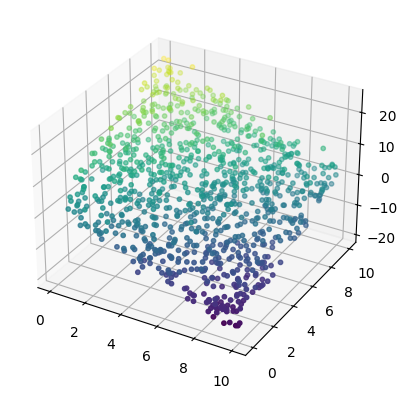

In [71]:
X_train = 10*np.random.rand(1000, 2)
noise = np.random.normal(0, 2, 1000) # 1000 puntos, media=0, std=2
y_train = (-2*X_train[:,0] + 2*X_train[:,1] + 2) + noise
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[:,0], X_train[:,1], y_train, s=10, c=y_train)
#ax.view_init(elev=25, azim=135)

## 1. Definición del Modelo y Ecuación

Entrenaremos un modelo de \textbf{regresión lineal multivariable} que ajusta los coeficientes ($\beta_0, \beta_1, \beta_2$) para predecir la variable objetivo ($\hat{y}$) a partir de dos variables predictoras ($x_0$ y $x_1$).

La ecuación de predicción es:

$$
\hat{y} = \beta_0 + \beta_1 x_0 + \beta_2 x_1
$$

Donde:
* $\mathbf{\beta_0}$: Es el término de \textbf{intercepción} (o sesgo).
* $\mathbf{\beta_1}$ y $\mathbf{\beta_2}$: Son los \textbf{coeficientes} (pendientes) que indican el efecto de $x_0$ y $x_1$ sobre $\hat{y}$, respectivamente.

---

## 2. Problema de Mínimos Cuadrados

El modelo de scikit-learn ajusta estos coeficientes resolviendo el problema de \textbf{mínimos cuadrados} (Least Squares), que busca minimizar la Suma de los Cuadrados de los Residuos ($\text{SCR}$) a lo largo de todas las $n$ observaciones (en este caso, $n=1000$ observaciones):

$$
(\beta_0, \beta_1, \beta_2) = \arg \min_{\beta_0, \beta_1, \beta_2} \sum_{i=1}^{1000} \left(y^{(i)} - (\beta_0 + \beta_1 x_0^{(i)} + \beta_2 x_1^{(i)})\right)^2
$$

---

## 3. Entrenamiento del Modelo

[-1.98272363  2.0234018 ]
1.8317639330995834
0.9372419715657291


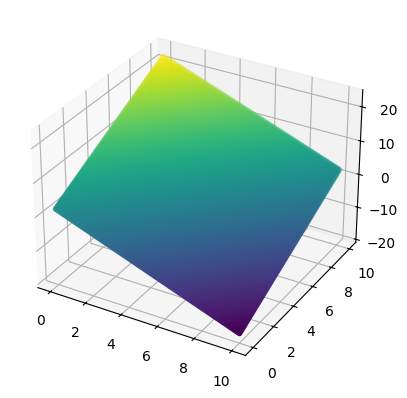

In [72]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)
values = np.linspace(0, 10, 100)
X_test = np.array([[x0, x1] for x0 in values for x1 in values])
y_test = reg.predict(X_test)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test[:,0], X_test[:,1], y_test, s=10, c=y_test)
print(reg.coef_)
print(reg.intercept_)
r2 = cross_val_score(reg, X_train, y_train, cv=5, scoring='r2')
print(r2.mean())

¿Si ahora hago otra dimensión más lo puedo hacer?

In [73]:
X_train = 10*np.random.rand(1000,3)#hiperplano
noise = np.random.normal(0, 2, 1000) # 1000 puntos, media=0, std=2
y_train = (-3*X_train[:,0] + 3*X_train[:,1]+3*X_train[:,2] + 3) + noise


[-3.  3.  3.]
3.0000000000000053
1.0


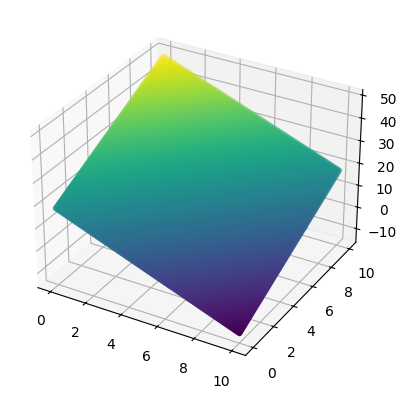

In [82]:
X_train = 10*np.random.rand(1000,3)#hiperplano
#noise = np.random.normal(0, 2, 1000) # 1000 puntos, media=0, std=2
y_train = (-3*X_train[:,0] + 3*X_train[:,1]+3*X_train[:,2] + 3) #+ noise

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)
values = np.linspace(0, 10, 100)
# Create X_test with 3 features, holding the third feature constant at 5
X_test = np.array([[x0, x1, 5] for x0 in values for x1 in values])
y_test = reg.predict(X_test)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Plot the first two features of X_test against y_test
ax.scatter(X_test[:,0], X_test[:,1], y_test, s=10, c=y_test)
print(reg.coef_)
print(reg.intercept_)
r2 = cross_val_score(reg, X_train, y_train, cv=5, scoring='r2')
print(r2.mean())

Cuando la relación entre la variable predictora ($x$) y la variable objetivo ($y$) no es de naturaleza estrictamente lineal, podemos \textbf{extender el modelo de regresión lineal} incluyendo \textbf{potencias de $x$}. Esto da lugar al \textbf{modelo de Regresión Polinomial}.

La forma general del modelo de regresión polinomial de grado $d$ es:

$$
y = \beta_0 + \beta_1 x + \beta_2 x^2 + \beta_3 x^3 + \cdots + \beta_d x^d + \varepsilon
$$

Donde:
\begin{itemize}
    \item $y$: Es la variable objetivo (dependiente).
    \item $x$: Es la variable predictora (independiente).
    \item $\beta_0, \beta_1, \ldots, \beta_d$: Son los parámetros (coeficientes) del modelo que deben ser estimados.
    \item $d$: Es el \textbf{grado del polinomio}, que determina la complejidad de la curva.
    \item $\varepsilon$: Es el término de error aleatorio.
\end{itemize}

\subsection{Naturaleza del Modelo}

Este modelo es \textbf{lineal en los parámetros $\beta_i$}, lo que significa que aún puede resolverse eficientemente mediante el método de Mínimos Cuadrados Ordinarios (utilizando una transformación de las características $x^k$). Sin embargo, es \textbf{no lineal en la variable $x$}, lo que le permite capturar \textbf{relaciones curvas} complejas entre las variables.

\subsection{Riesgo de Sobreajuste}

Es crucial seleccionar un grado $d$ apropiado. Para \textbf{grados altos} ($d$ grande), el modelo se vuelve demasiado flexible y puede comenzar a \textbf{ajustar el ruido} presente en los datos en lugar de la señal subyacente, produciendo el fenómeno de \textbf{sobreajuste} (\textit{overfitting}).

\section{Generación de Datos con Comportamiento No Lineal}

Para ilustrar este tipo de regresión, se crea un conjunto de datos sintéticos con un comportamiento inherentemente no lineal (cosenoidal) y ruido aditivo.

La función utilizada para generar la variable objetivo ($y$) es:
$$
y = 4 \cos(x) + \varepsilon
$$
Donde $\varepsilon$ representa el \textbf{ruido Gaussiano} ($\mathcal{N}(0, \sigma^2)$).

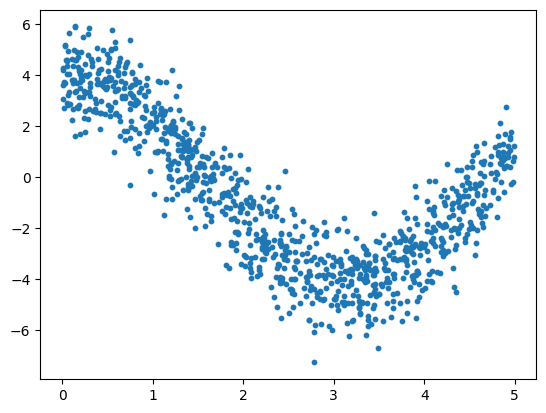

In [102]:
def make_nonlinear_data(num_samples):
 np.random.seed(123456)
 noise = np.random.normal(0, 1, num_samples)
 x = 5*np.random.rand(num_samples)
 y = 4*np.cos(x) + noise
 return x, y

x, y = make_nonlinear_data(1000)
plt.scatter(x, y, s=10)


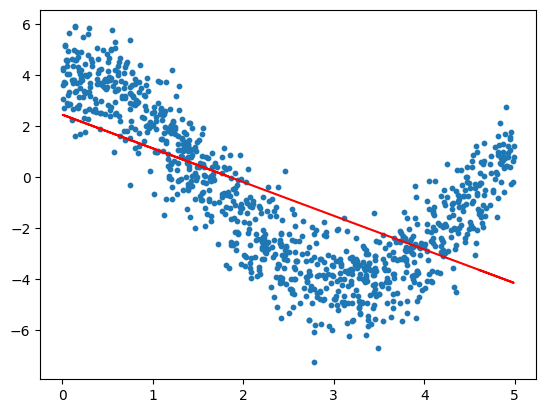

In [103]:
reg_lin = LinearRegression() #regresion lineal, da una linea horrible
reg_lin.fit(x.reshape(-1,1), y)
y_lin = reg_lin.predict(x.reshape(-1,1))
plt.scatter(x, y, s=10)
plt.plot(x, y_lin, color="red")

Ahora ajustamos un modelo de regresi ́on polinomial usando la herramienta
PolynomialFeatures:
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html



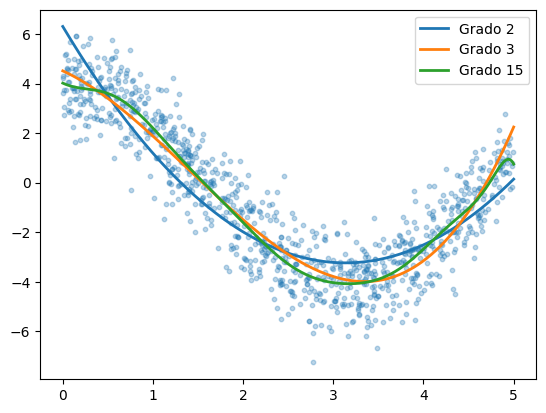

In [109]:
from sklearn.preprocessing import PolynomialFeatures
def fit_poly(x, y, degree):
 poly = PolynomialFeatures(degree)
 Xp = poly.fit_transform(x.reshape(-1,1))
 reg = LinearRegression()
 reg.fit(Xp, y)
 return reg, poly
#Vamos a probar diferentes grados (2, 3, 15):
degrees = [2, 3, 15]
Xs = np.linspace(0, 5, 400).reshape(-1,1)
plt.scatter(x, y, s=10, alpha=0.3)
for d in degrees:
 reg, poly = fit_poly(x, y, d)
 Xs_poly = poly.transform(Xs)
 y_pred = reg.predict(Xs_poly)
 plt.plot(Xs, y_pred, linewidth=2, label=f"Grado {d}")
 plt.legend()
plt.show()

In [105]:
#Ahora evaluamos mediante validaci ́on cruzada:
for d in [2,3,15]:
 reg, poly = fit_poly(x, y, d)
 Xp = poly.transform(x.reshape(-1,1))
 r2 = cross_val_score(reg, Xp, y, cv=5, scoring="r2")
 print(f"Grado {d}, R2 = {r2.mean()}")



Grado 2, R2 = 0.7925119034037211
Grado 3, R2 = 0.8569223234323416
Grado 15, R2 = 0.8654824154000776


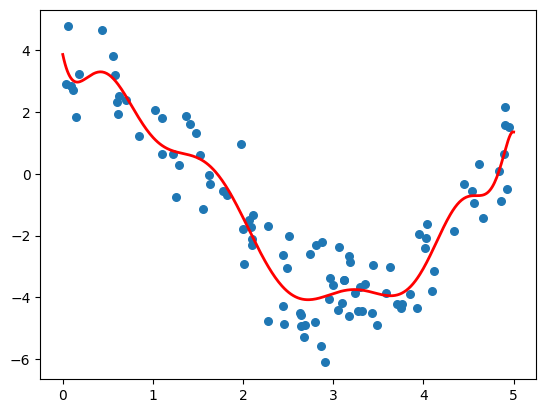

In [112]:
#Hacer sobreajustes, el problema de hacerlo demasiado bien
x, y = make_nonlinear_data(100)
poly = PolynomialFeatures(15)
X_poly = poly.fit_transform(x.reshape(-1,1))
reg = LinearRegression()
reg.fit(X_poly, y)
xs = np.linspace(0, 5, 400)
Xs_poly = poly.transform(xs.reshape(-1,1))
y_pred = reg.predict(Xs_poly)
plt.scatter(x, y, s=30, label="Datos (60)")
plt.plot(xs, y_pred, c="red", linewidth=2, label="Grado 15")

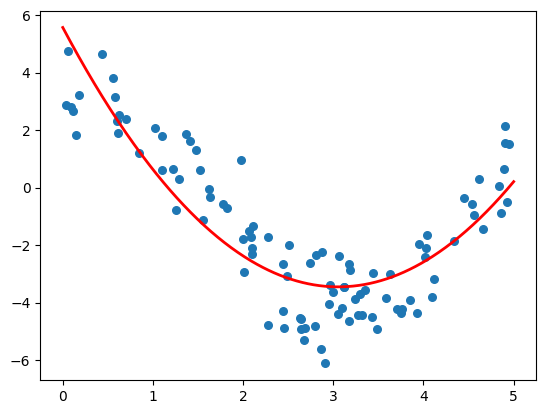

In [113]:
x, y = make_nonlinear_data(100)
poly = PolynomialFeatures(2)
X_poly = poly.fit_transform(x.reshape(-1,1))
reg = LinearRegression()
reg.fit(X_poly, y)
xs = np.linspace(0, 5, 400)
Xs_poly = poly.transform(xs.reshape(-1,1))
y_pred = reg.predict(Xs_poly)
plt.scatter(x, y, s=30, label="Datos (60)")
plt.plot(xs, y_pred, c="red", linewidth=2, label="Grado 15")

Como regularizar y hacer que el arbol de decision no sobreajuste
La regularizaci ́on Lasso penaliza la suma de los valores absolutos de los co-
eficientes, forzando al modelo a tener coeficientes m ́as peque ̃nos. Esto produce

modelos m ́as simples y mas estables.
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

Otro minimizador mas complejo https://www.researchgate.net/publication/322842755_Metodo_BFGS_estructurado_para_la_estimacion_de_maxima_verosimilitud

0.8415511829232015


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.201e+01, tolerance: 7.125e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.367e+01, tolerance: 5.868e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.019e+01, tolerance: 5.826e

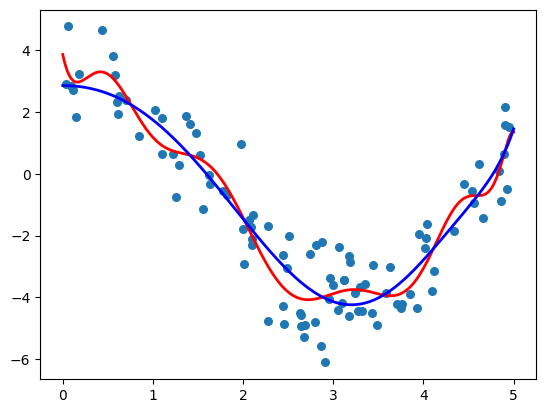

In [116]:
from sklearn.linear_model import Lasso
reg_lasso = Lasso(alpha=0.1, max_iter=10000)
reg_lasso.fit(X_poly, y)
xs = np.linspace(0, 5, 400)
Xs_poly = poly.transform(xs.reshape(-1,1))
y_pred_lasso = reg_lasso.predict(Xs_poly)
plt.scatter(x, y, s=30)

plt.plot(xs, y_pred, c="red", linewidth=2, label="Grado 15")
plt.plot(xs, y_pred_lasso, c="blue", linewidth=2)

r2_lasso=cross_val_score(reg_lasso, X_poly, y, cv=5, scoring="r2")
print(r2_lasso.mean())
#No ajusta por minimos cuadrados, tarea posible, los precisos de ARBNB, revisar los precios en condesa y ajustar para predecir
#DecisionTreeRegressor
#cual tarea estoy haciendo, cada tarea tiene sus problemas, problemas de ruido y sobre ajuste

https://scikit-learn.org/stable/modules/tree.html
